In [176]:
from mirror_gates.noisy_fidelity import heuristic_fidelity
import numpy as np
import matplotlib.pyplot as plt
import LovelyPlots.utils as lp  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401

In [177]:
# Constants
N = 16

start_value = 0
end_value = 10_000
num_points = 1000

# Generate Qiskit data
qiskit_durations = np.linspace(
    start_value, end_value, num_points
)  # Define start_value, end_value, and num_points as per your data
qiskit_fidelities = heuristic_fidelity(N, qiskit_durations)

# Generate MIRAGE data (shifted by depth reduction)
mirage_durations_hh = qiskit_durations * (1 - 0.3119)  # 31.19% reduction for heavy-hex
mirage_fidelities_hh = heuristic_fidelity(N, mirage_durations_hh)

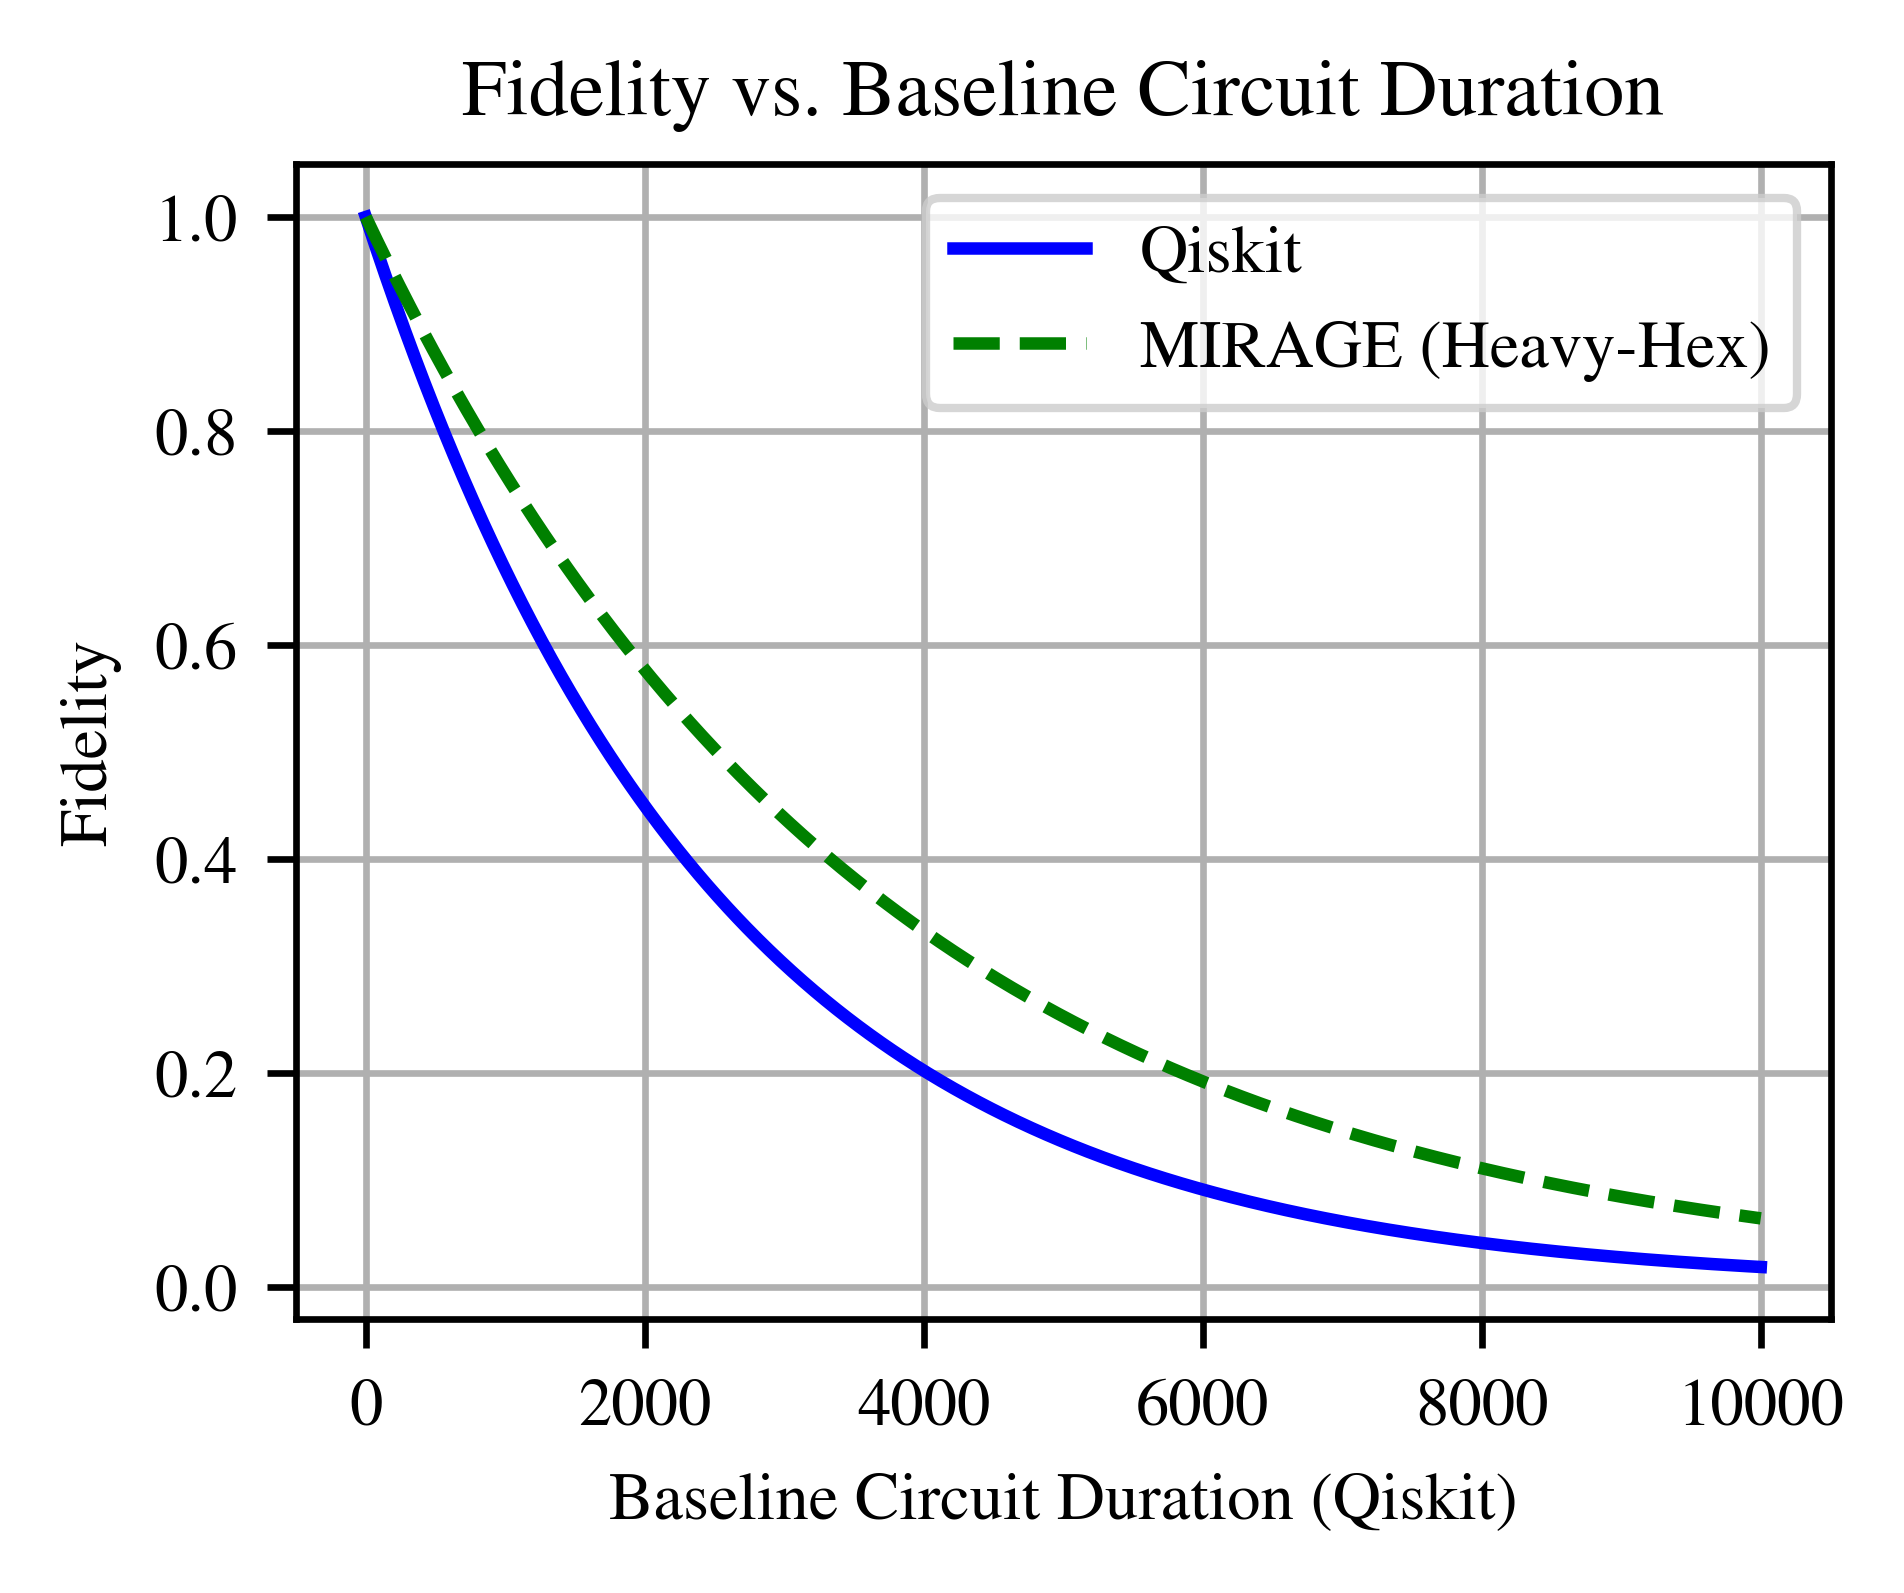

In [178]:
with plt.style.context(["ieee"]):
    # Plot Qiskit data
    plt.plot(qiskit_durations, qiskit_fidelities, label="Qiskit", color="blue")

    # Plot MIRAGE data using Qiskit's durations as the x-axis
    plt.plot(
        qiskit_durations,
        mirage_fidelities_hh,
        label="MIRAGE (Heavy-Hex)",
        color="green",
    )

    # Add labels, title, legend, etc.
    plt.xlabel("Baseline Circuit Duration (Qiskit)")
    plt.ylabel("Fidelity")
    plt.title("Fidelity vs. Baseline Circuit Duration")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

In [179]:
circuits = [
    "ae_n16",
    "bigadder_n18",
    "knn_n25",
    "multiplier_n15",
    "portfolioqaoa_n16",
    "qec9xz_n17",
    "qft_n18",
    "qftentangled_n16",
    "qpeexact_n16",
    "qram_n20",
    "sat_n11",
    "seca_n11",
    "swap_test_n25",
]

# Values taken from outputs of previous runs
# experiment 1
sqrtiswap_mirage_hh = [
    71.369,
    103.163,
    70.141,
    168.167,
    113.540,
    21.699,
    58.570,
    51.719,
    70.866,
    81.952,
    225.484,
    37.187,
    70.141,
]
sqrtiswap_qiskit_hh = [
    122.362,
    131.494,
    79.406,
    195.946,
    250.689,
    30.773,
    108.342,
    120.588,
    167.700,
    94.756,
    286.870,
    49.257,
    79.700,
]
# experiment 2
sqrtiswap_mirage_sl = [
    67.312,
    87.793,
    64.635,
    147.498,
    90.500,
    15.751,
    52.341,
    52.662,
    66.810,
    76.280,
    209.375,
    33.892,
    64.635,
]
sqrtiswap_qiskit_sl = [
    120.638,
    109.040,
    69.573,
    175.528,
    236.824,
    22.211,
    108.948,
    95.484,
    139.716,
    83.561,
    235.682,
    49.288,
    69.392,
]
# experiment 3
cnot_mirage_hh = [
    151.813,
    158.463,
    126.188,
    303.863,
    181.000,
    37.859,
    121.184,
    97.834,
    150.797,
    135.909,
    356.949,
    55.177,
    126.188,
]
cnot_qiskit_hh = [
    261.086,
    192.257,
    131.488,
    283.823,
    431.180,
    42.951,
    215.338,
    223.833,
    325.028,
    148.078,
    440.340,
    69.558,
    130.761,
]
# experiment 4
syc_mirage_sl = [
    136.397,
    194.039,
    148.365,
    336.419,
    181.000,
    41.089,
    100.184,
    101.762,
    136.397,
    155.747,
    458.447,
    76.565,
    148.365,
]
syc_qiskit_sl = [
    213.839,
    217.868,
    143.501,
    365.007,
    398.886,
    49.669,
    209.958,
    219.996,
    271.189,
    163.659,
    483.290,
    96.168,
    143.910,
]

In [180]:
# sort so circuits appear as same order they do in the paper
sorted_circuits = [
    "qec9xz_n17",
    "seca_n11",
    "knn_n25",
    "swap_test_n25",
    "qram_n20",
    "qft_n18",
    "qftentangled_n16",
    "ae_n16",
    "bigadder_n18",
    "qpeexact_n16",
    "multiplier_n15",
    "portfolioqaoa_n16",
    "sat_n11",
]

# Create a dictionary with circuits as keys and their index in sorted_circuits as values
index_map = {circuit: index for index, circuit in enumerate(sorted_circuits)}

# Sort all your lists based on the order in sorted_circuits
sqrtiswap_mirage_hh = [
    x
    for _, x in sorted(
        zip(circuits, sqrtiswap_mirage_hh), key=lambda pair: index_map[pair[0]]
    )
]
sqrtiswap_qiskit_hh = [
    x
    for _, x in sorted(
        zip(circuits, sqrtiswap_qiskit_hh), key=lambda pair: index_map[pair[0]]
    )
]
sqrtiswap_mirage_sl = [
    x
    for _, x in sorted(
        zip(circuits, sqrtiswap_mirage_sl), key=lambda pair: index_map[pair[0]]
    )
]
sqrtiswap_qiskit_sl = [
    x
    for _, x in sorted(
        zip(circuits, sqrtiswap_qiskit_sl), key=lambda pair: index_map[pair[0]]
    )
]
cnot_mirage_hh = [
    x
    for _, x in sorted(
        zip(circuits, cnot_mirage_hh), key=lambda pair: index_map[pair[0]]
    )
]
cnot_qiskit_hh = [
    x
    for _, x in sorted(
        zip(circuits, cnot_qiskit_hh), key=lambda pair: index_map[pair[0]]
    )
]
syc_mirage_sl = [
    x
    for _, x in sorted(
        zip(circuits, syc_mirage_sl), key=lambda pair: index_map[pair[0]]
    )
]
syc_qiskit_sl = [
    x
    for _, x in sorted(
        zip(circuits, syc_qiskit_sl), key=lambda pair: index_map[pair[0]]
    )
]

circuits = sorted_circuits

In [181]:
import matplotlib.pyplot as plt
import numpy as np


# Function to convert depth to duration
def depth_to_duration(depth, gate_time_1q=25, gate_time_2q=100):
    return (gate_time_1q * depth + gate_time_2q * depth) + gate_time_1q


def hf(n, d):
    return heuristic_fidelity(n, d, T1=1600_000, T2=1600_000)


# Calculate durations for all experiments
durations_mirage_hh = [depth_to_duration(d) for d in sqrtiswap_mirage_hh]
durations_qiskit_hh = [depth_to_duration(d) for d in sqrtiswap_qiskit_hh]

durations_mirage_sl = [depth_to_duration(d) for d in sqrtiswap_mirage_sl]
durations_qiskit_sl = [depth_to_duration(d) for d in sqrtiswap_qiskit_sl]

durations_cnot_mirage_hh = [depth_to_duration(d) for d in cnot_mirage_hh]
durations_cnot_qiskit_hh = [depth_to_duration(d) for d in cnot_qiskit_hh]

durations_syc_mirage_sl = [depth_to_duration(d) for d in syc_mirage_sl]
durations_syc_qiskit_sl = [depth_to_duration(d) for d in syc_qiskit_sl]

# Calculate fidelities for all experiments
fidelities_mirage_hh = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_mirage_hh)
]
fidelities_qiskit_hh = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_qiskit_hh)
]

fidelities_mirage_sl = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_mirage_sl)
]
fidelities_qiskit_sl = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_qiskit_sl)
]

fidelities_cnot_mirage_hh = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_cnot_mirage_hh)
]
fidelities_cnot_qiskit_hh = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_cnot_qiskit_hh)
]

fidelities_syc_mirage_sl = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_syc_mirage_sl)
]
fidelities_syc_qiskit_sl = [
    hf(int(circuit.split("_")[-1][1:]), d)
    for circuit, d in zip(circuits, durations_syc_qiskit_sl)
]

In [182]:
# Calculate relative changes in fidelity for all experiments
relative_changes_hh = [
    (fm - fq) / fq for fm, fq in zip(fidelities_mirage_hh, fidelities_qiskit_hh)
]
relative_changes_sl = [
    (fm - fq) / fq for fm, fq in zip(fidelities_mirage_sl, fidelities_qiskit_sl)
]
relative_changes_cnot_hh = [
    (fm - fq) / fq
    for fm, fq in zip(fidelities_cnot_mirage_hh, fidelities_cnot_qiskit_hh)
]
relative_changes_syc_sl = [
    (fm - fq) / fq for fm, fq in zip(fidelities_syc_mirage_sl, fidelities_syc_qiskit_sl)
]

relative_changes_hh = [
    (fm - fq) for fm, fq in zip(fidelities_mirage_hh, fidelities_qiskit_hh)
]
relative_changes_sl = [
    (fm - fq) for fm, fq in zip(fidelities_mirage_sl, fidelities_qiskit_sl)
]
relative_changes_cnot_hh = [
    (fm - fq) for fm, fq in zip(fidelities_cnot_mirage_hh, fidelities_cnot_qiskit_hh)
]
relative_changes_syc_sl = [
    (fm - fq) for fm, fq in zip(fidelities_syc_mirage_sl, fidelities_syc_qiskit_sl)
]

In [183]:
# # Zip all data together using circuits as the key
# data = list(
#     zip(
#         circuits,
#         relative_changes_hh,
#         relative_changes_sl,
#         relative_changes_cnot_hh,
#         relative_changes_syc_sl,
#     )
# )

# # Sort the data by the values of sqrtiswap_mirage_hh (Experiment 1)
# sorted_data = sorted(data, key=lambda x: x[1])

# # Unzip the sorted data back into individual lists
# (
#     circuits,
#     relative_changes_hh,
#     relative_changes_sl,
#     relative_changes_cnot_hh,
#     relative_changes_syc_sl,
# ) = map(list, zip(*sorted_data))

In [184]:
# arithmetic mean
relative_changes_hh.append(np.mean(relative_changes_hh))
relative_changes_sl.append(np.mean(relative_changes_sl))
relative_changes_cnot_hh.append(np.mean(relative_changes_cnot_hh))
relative_changes_syc_sl.append(np.mean(relative_changes_syc_sl))

circuits.append("Average")

In [185]:
from typing import List, Tuple

import LovelyPlots.utils as lp  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401
from matplotlib.colors import ListedColormap
from matplotlib.figure import Axes, Figure
from matplotlib.ticker import MaxNLocator

from transpile_benchy.benchmark import Benchmark
from transpile_benchy.metrics.abc_metrics import MetricInterface


def _initialize_plot(legend_show: bool) -> Tuple[Figure, Axes]:
    """Initialize the plot and returns the fig and ax."""
    ref_size = 1.25  # Assume need .4 for legend
    legend_offset = 0.5
    if legend_show:
        fig, axs = plt.subplots(
            2,
            figsize=(
                3.5,
                ref_size + legend_offset,
            ),  # 2 inch for plot + 1 inch for legend
            sharex=True,
            gridspec_kw={
                "height_ratios": [legend_offset, ref_size + legend_offset],
                "hspace": 0.01,
            },  # 1:2 ratio for legend:plot
        )
        ax = axs[1]
    else:
        fig, ax = plt.subplots(figsize=(3.5, ref_size))  # Just 2 inch for the plot
    return fig, ax

In [189]:
names = [
    "HH-$\sqrt{\mathrm{iSWAP}}$",
    "SL-$\sqrt{\mathrm{iSWAP}}$",
    "HH-$\mathrm{CNOT}$",
    "SL-$\mathrm{SYC}$",
]

cmap = plt.cm.get_cmap("tab10", 10)

plt.rc("legend", fontsize=8)
plt.rc("axes", labelsize=8)

with plt.style.context(["ieee"]):
    # Set up the figure and axes
    fig, ax = _initialize_plot(True)

    bar_width = 0.2
    index = np.arange(len(circuits))

    # Add bars for each experiment using the relative changes
    ax.bar(
        index - 1.5 * bar_width,
        relative_changes_hh,
        width=bar_width,
        label=r"HH-$\sqrt{\texttt{iSWAP}}$",
        color=cmap(0),
    )
    ax.bar(
        index - 0.5 * bar_width,
        relative_changes_sl,
        width=bar_width,
        label=r"SL-$\sqrt{\texttt{iSWAP}}$",
        # color="red",
        color=cmap(1),
    )
    ax.bar(
        index + 0.5 * bar_width,
        relative_changes_cnot_hh,
        width=bar_width,
        label=r"HH-$\texttt{CNOT}$",
        # color="green",
        color=cmap(2),
    )
    ax.bar(
        index + 1.5 * bar_width,
        relative_changes_syc_sl,
        width=bar_width,
        label=r"SL-$\texttt{SYC}$",
        # color="orange",
        color=cmap(3),
    )

    # Add labels, title, and legend
    ax.set_ylabel("Absolute Fidelity Change")
    ax.set_xticks(index)
    ax.set_xticklabels(
        circuits,
        rotation=30,
        ha="right",
        fontsize=7,
    )
    # ax.set_yscale("log")

    ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

    # we need more ticks on y-axis
    ax.yaxis.set_major_locator(MaxNLocator(5))

    ax.set_yticklabels(["{:.0f}%".format(val * 100) for val in ax.get_yticks()])

    for j, name in enumerate(names):
        fig.axes[0].bar(0, 0, color=cmap(j), label=f"{name}")
    fig.axes[0].legend(
        loc="upper center",
        ncol=2,
        fontsize=8,
        frameon=False,
        bbox_to_anchor=(0.5, 1.5),  # 1.10
    )
    fig.axes[0].axis("off")

    # show grid
    # fig.axes[1].grid(True, axis="y", which="major", linestyle="--", alpha=0.5)

    # Show the plot
    plt.tight_layout()

/tmp/ipykernel_1226/2179937374.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", 10)
/tmp/ipykernel_1226/2179937374.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
/tmp/ipykernel_1226/2179937374.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


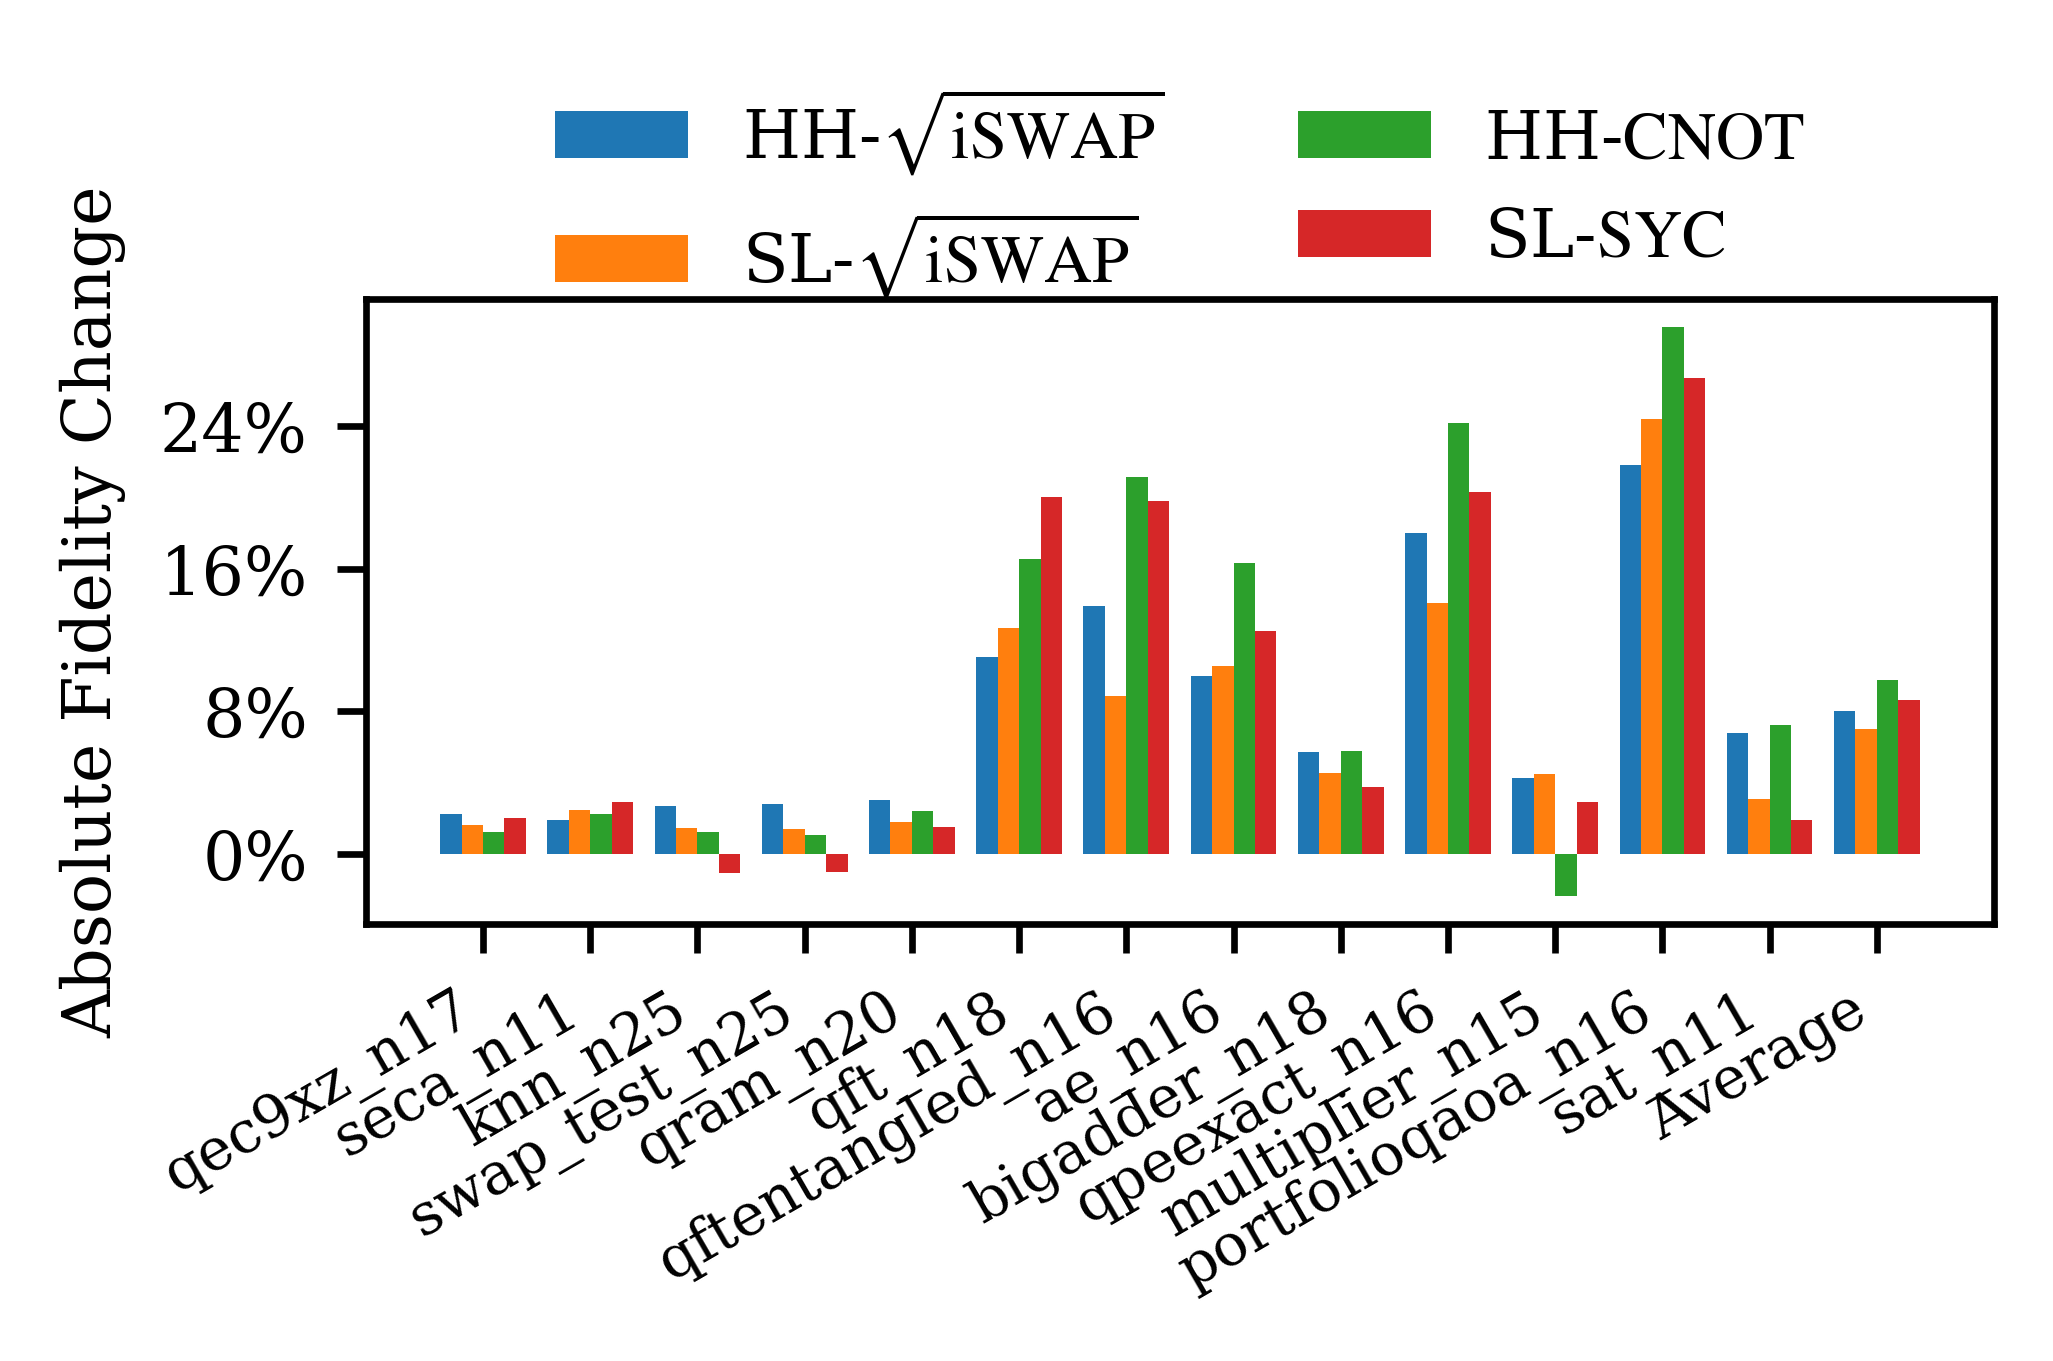

In [191]:
fig

In [193]:
fig.savefig(
    "test.pdf",
    bbox_inches="tight",
    pad_inches=0,
)